In [ ]:
import numpy as np
import pandas as pd

In [ ]:
mk = pd.read_csv('marketing_campaign.csv')

In [ ]:
mk.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
mk=mk.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
mk.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


Z_CostContact, Z_Revenue는 모든 행이 같은 값을 가지고 있어서 삭제해주었습니다

In [ ]:
mk.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [ ]:
# converting columns to DateTime format
from datetime import date
mk['Year_Birth'] = pd.to_datetime(mk['Year_Birth'], format ='%Y') # int 자료형을 datetime으로 변환
mk['Dt_Customer'] = pd.to_datetime(mk['Dt_Customer'])  # object 자료형을 datetime으로 변환

# 이상치 제거

1. age 100살 이상 지우기

In [ ]:
a = mk[mk['Age'] >= 100].index
mk.drop(a, inplace=True)

In [ ]:
 mk[mk['Age'] >= 100].index

Int64Index([], dtype='int64')

2. income 결측치 24개 지우기

In [ ]:
mk = mk.dropna()

In [ ]:
mk.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProducts        0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
TotalMntSpent          0
TotalNumPurchases      0
Total_Acc_Cmp          0
Children               0
Year_Joined            0
Month_Joined           0
Day_Joined             0
Age                    0
Years_Customer         0
Days_Customer          0
dtype: int64

3. Income 이상치 8개 지우기

In [ ]:
b = mk[mk['Income'] > 140000].index
mk.drop(b, inplace=True)

## 파생변수 만들기

In [ ]:
#제품에 지출된 총액
mk['TotalMntSpent'] = mk['MntWines'] + mk['MntFruits'] + mk['MntMeatProducts'] + mk['MntFishProducts'] + mk['MntSweetProducts'] + mk['MntGoldProducts']

In [ ]:
#총 구매 건수
mk['TotalNumPurchases'] = mk['NumWebPurchases'] + mk['NumCatalogPurchases'] + mk['NumStorePurchases'] + mk['NumDealsPurchases']

In [ ]:
# 승인된 총 캠페인 수
mk['Total_Acc_Cmp'] = mk['AcceptedCmp1'] + mk['AcceptedCmp2'] + mk['AcceptedCmp3'] + mk['AcceptedCmp4'] + mk['AcceptedCmp5'] + mk['Response']

In [ ]:
# 결혼상태 파트너 생성 변수를 그냥 없애고 결혼상태를 이진분류로 바꿔줌
mk['Marital_Status'] = mk['Marital_Status'].replace(['Married', 'Together'],'relationship')
mk['Marital_Status'] = mk['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [ ]:
# 가구 내 총 자녀 수
mk["Children"] = mk["Kidhome"] +  mk["Teenhome"]

In [ ]:
# 교육 수준을 세 그룹으로 세분화
mk["Education"]=mk["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
# 가입한 날짜, 월 및 연도에 대한 열 추가
mk['Year_Joined'] = mk['Dt_Customer'].dt.year # 연도 추출
mk['Month_Joined'] = mk['Dt_Customer'].dt.strftime("%B") # strftime: 날짜 형식 변환 %B:locale 월
mk['Day_Joined'] = mk['Dt_Customer'].dt.day_name() # day_name: 요일을 문자열로 추출

In [ ]:
# 연령 및 연도 생성_고객
mk['Age'] = (mk["Dt_Customer"].dt.year.max()) - (mk['Year_Birth'].dt.year)
mk['Years_Customer'] = (mk["Dt_Customer"].dt.year.max()) - (mk['Dt_Customer'].dt.year)
mk['Days_Customer'] = (mk["Dt_Customer"].max()) - (mk['Dt_Customer'])

## 필요없는 변수 삭제

In [ ]:
print(mk.shape)
pd.options.display.max_columns = None
mk.head()

(2205, 37)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Year_Joined,Month_Joined,Day_Joined,Age,Years_Customer,Days_Customer
0,5524,1957-01-01,Graduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,25,1,0,2012,April,Monday,57,2,971 days
1,2174,1954-01-01,Graduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,6,0,2,2014,August,Sunday,60,0,125 days
2,4141,1965-01-01,Graduate,relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,21,0,0,2013,August,Wednesday,49,1,472 days
3,6182,1984-01-01,Graduate,relationship,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,8,0,1,2014,October,Thursday,30,0,65 days
4,5324,1981-01-01,Postgraduate,relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,19,0,1,2014,January,Sunday,33,0,321 days


In [ ]:
 mk.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalMntSpent',
       'TotalNumPurchases', 'Total_Acc_Cmp', 'Children', 'Year_Joined',
       'Month_Joined', 'Day_Joined', 'Age', 'Years_Customer', 'Days_Customer'],
      dtype='object')

In [ ]:
mk.drop(['ID','Year_Birth','Kidhome','Teenhome','Dt_Customer','Day_Joined'],axis=1, inplace=True)

In [ ]:
mk.drop(['Year_Joined','Month_Joined'],axis=1, inplace=True)

year_birth으로 나이 파생변수 만들었으니까 삭제, ID는 필요없으니까 삭제했습니다, 

kidhome+teenhome으로 children 변수 생성했으니까 kidhome과 teenhome도 삭제했습니다, 

day_joined, year_joined, month_joined 는 고객을 분류하는데 필요없을 것 같아서 삭제했습니다

In [ ]:
mk.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalMntSpent',
       'TotalNumPurchases', 'Total_Acc_Cmp', 'Children', 'Age',
       'Years_Customer', 'Days_Customer'],
      dtype='object')

In [ ]:
mk['Days_Customer'] = mk['Days_Customer'].dt.days.astype('int16')

In [ ]:
mk['Marital_Status'].value_counts()
mk['Marital_Status'] = np.where(mk['Marital_Status']=='Single', 0, 1) # single:0, relationship:1

In [ ]:
mk['Education'].value_counts()

Graduate         1113
Postgraduate      840
Undergraduate     252
Name: Education, dtype: int64

In [ ]:
mk_dummies=pd.get_dummies(mk[['Education']],drop_first=True)

In [ ]:
mk.drop(['Education'],axis=1, inplace=True)

In [ ]:
mk1 = pd.concat([mk ,mk_dummies], axis=1)

In [ ]:
mk1.head()

,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Age,Years_Customer,Days_Customer,Education_Postgraduate,Education_Undergraduate
0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,25,1,0,57,2,971,0,0
1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,6,0,2,60,0,125,0,0
2,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,21,0,0,49,1,472,0,0
3,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,8,0,1,30,0,65,0,0
4,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,19,0,1,33,0,321,1,0


In [ ]:
mk2 = mk1.copy()

In [ ]:
mk2.shape

(2205, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(mk2.values)
scaled_features_df = pd.DataFrame(scaled_features, index=mk2.index, columns=mk2.columns)

In [ ]:
scaled_features_df2 = scaled_features_df.copy()

# **PCA**

1. 주성분을 15개로

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
printcipalComponents = pca.fit_transform(scaled_features_df2)

In [ ]:
principalDf = pd.DataFrame(data=printcipalComponents)

In [ ]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4.626826,-0.732702,2.192871,-2.258634,-0.613984,-1.517852,-0.140423,1.156549,-0.756731,-1.119630,-0.432336,0.707359,-0.146875,-0.332398,1.071725
1,-2.977074,0.249360,-1.823924,1.319498,-0.750002,0.079491,-0.331346,1.438682,-0.385212,-1.373123,-0.405019,0.575288,0.019459,0.666881,-0.246810
2,1.694708,-1.545783,-0.438966,0.111090,0.038755,0.223640,-0.801573,-0.464702,0.791201,-0.004470,0.787371,0.173842,1.076289,-0.514800,0.510144
3,-2.957046,0.282487,-1.979981,0.292573,-0.625975,0.955680,-0.711659,-0.518345,0.486702,1.135426,-0.119428,0.732623,0.377511,0.009663,0.070924
4,-0.318534,-1.006437,-0.503287,1.552014,-0.225526,0.655300,0.863930,-0.621158,-0.587038,1.598245,-0.621088,-0.035938,-1.232339,-0.452326,0.407170


In [ ]:
pca.explained_variance_ratio_

array([0.28658165, 0.08712701, 0.08457945, 0.06431368, 0.04271084,
       0.04204789, 0.03402652, 0.03348785, 0.03343754, 0.02922879,
       0.0282292 , 0.02598219, 0.02281934, 0.02099298, 0.02039908])

In [ ]:
sum(pca.explained_variance_ratio_)

0.8462759172915463

15개의 주성분이 전체 분산의 약 85%를 설명해준다

2. 분산의 95%를 보존해주는 개수 : 20개

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
printcipalComponents = pca.fit_transform(scaled_features_df2)

principalDf = pd.DataFrame(data=printcipalComponents)
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,4.626826,-0.732701,2.192870,-2.258639,-0.614008,-1.517860,-0.140510,1.156609,-0.756825,-1.119526,-0.432344,0.707236,-0.146868,-0.332425,1.071419,1.018276,0.192849,1.718145,1.352576,0.476493,-0.697853
1,-2.977074,0.249360,-1.823924,1.319501,-0.749991,0.079497,-0.331316,1.438656,-0.385173,-1.373181,-0.405018,0.575398,0.019468,0.666909,-0.246645,-0.411948,0.099570,-0.067480,0.374257,-0.008643,-0.376759
2,1.694708,-1.545782,-0.438966,0.111097,0.038772,0.223655,-0.801538,-0.464748,0.791234,-0.004582,0.787367,0.174114,1.076327,-0.514728,0.510453,-0.676559,0.597109,0.424113,-0.424843,-0.620947,-0.026510
3,-2.957046,0.282484,-1.979979,0.292571,-0.625949,0.955669,-0.711507,-0.518402,0.486880,1.135394,-0.119397,0.732363,0.377409,0.009576,0.071072,-0.132220,0.045431,0.497025,0.186167,0.072232,0.155952
4,-0.318534,-1.006434,-0.503289,1.552018,-0.225553,0.655317,0.863761,-0.621102,-0.587242,1.598251,-0.621126,-0.035557,-1.232210,-0.452204,0.407081,0.852814,-0.141811,0.441161,-0.169478,-0.056942,0.514089


In [ ]:
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

0.9538415894093275

Text(0, 0.5, '주성분')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text

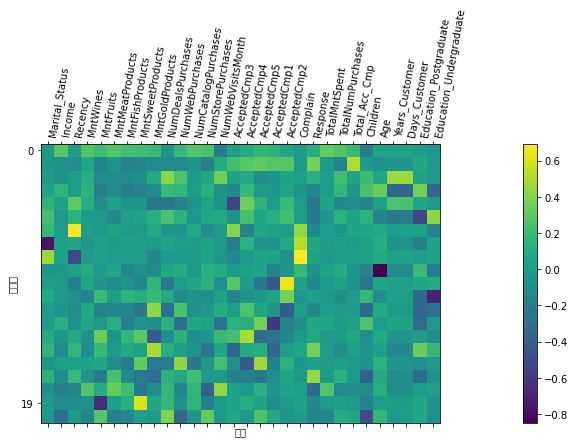

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.matshow(pca.components_,fignum=1)
plt.yticks([0,19])
plt.colorbar()
plt.xticks(range(len(scaled_features_df2.columns)),scaled_features_df2.columns,rotation=80, ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')

# **클러스터링**

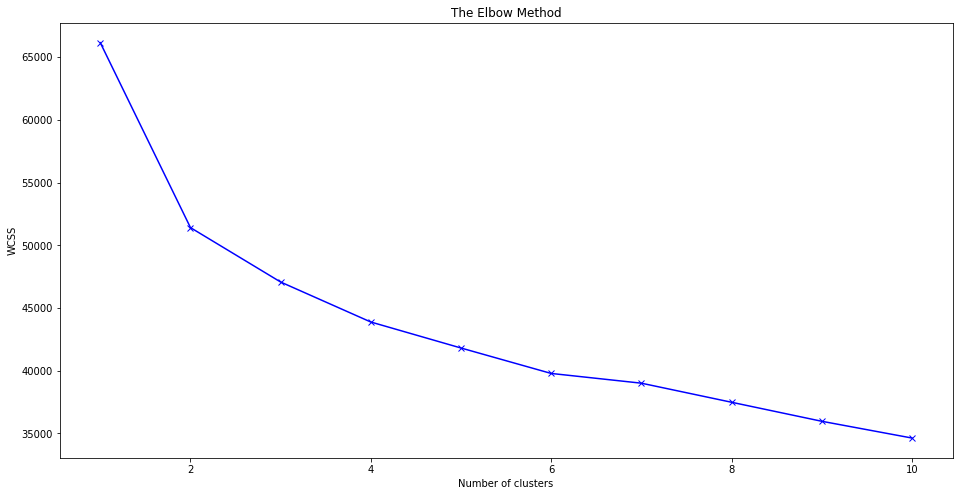

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

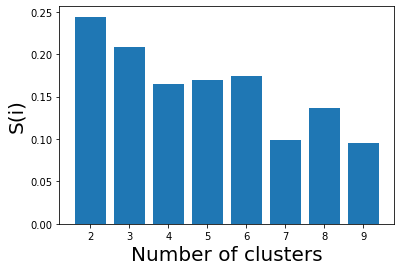

In [ ]:
from sklearn.metrics import silhouette_score 
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


제가 있는 변수로 진행했을 때는 최적의 k의 값은 2라고 나왔습니다

In [ ]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

mk['cluster'] = pred + 1

## PCA 후 클러스터링

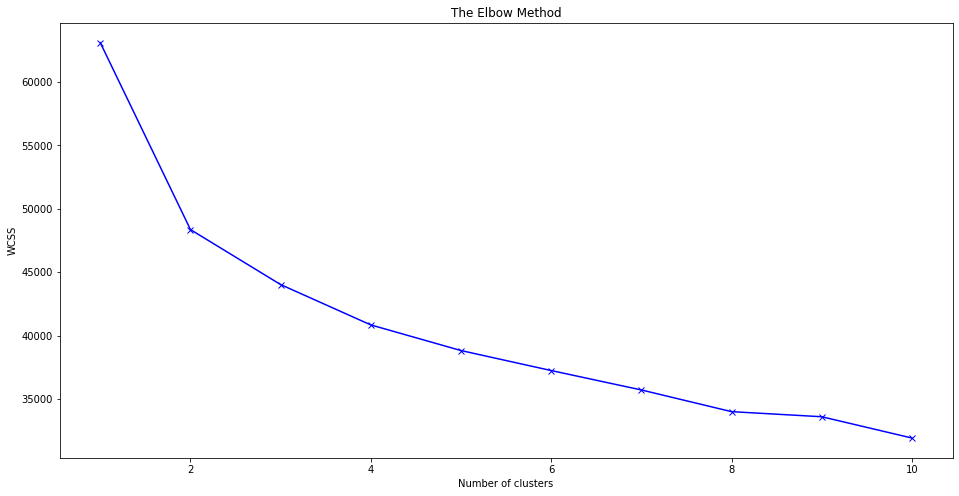

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(printcipalComponents)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

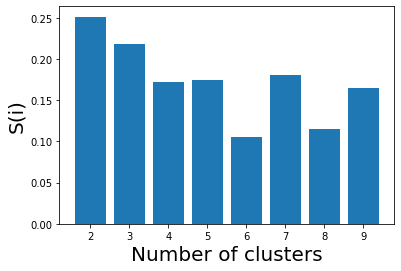

In [ ]:
from sklearn.metrics import silhouette_score 
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(printcipalComponents)
    silhouette_scores.append(silhouette_score(printcipalComponents, m1.fit_predict(printcipalComponents))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


In [ ]:
mk_pca = mk.copy()

In [ ]:
kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(printcipalComponents)
pred=kmeans.predict(printcipalComponents)
mk_pca['cluster'] = pred + 1

In [ ]:
mk_pca['cluster'].value_counts()

2    1309
1     896
Name: cluster, dtype: int64

In [ ]:
mk['cluster'].value_counts()

1    1307
2     898
Name: cluster, dtype: int64

PCA를 진행한 결과나 진행하지 않고 한 결과나 분류 차이가 나지 않아서 변수의 명을 쉽게 파악할 수 있게 PCA는 진행하지 않도록 했습니다

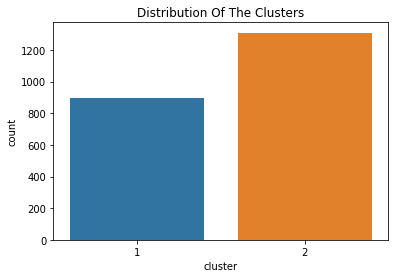

In [ ]:
import seaborn as sns
pl = sns.countplot(x=mk_pca["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# **추가로 해보기**

In [ ]:
mk.columns

Index(['Marital_Status', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalMntSpent',
       'TotalNumPurchases', 'Total_Acc_Cmp', 'Children', 'Age',
       'Years_Customer', 'Days_Customer', 'cluster'],
      dtype='object')

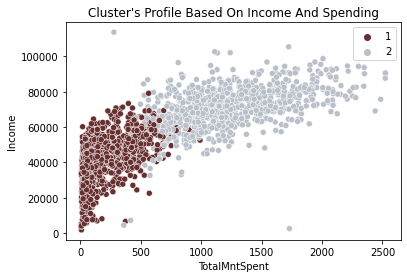

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = mk,x=mk['TotalMntSpent'], y=mk["Income"],hue=mk["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

totalmntspent와 income변수를 사용해 그려보면 기준에 맞게 분류가 잘 되어있는걸 볼 수 있다

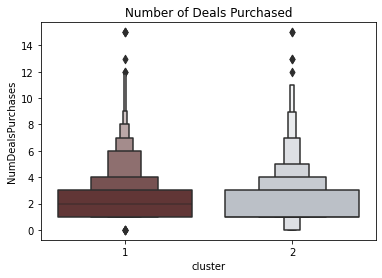

In [ ]:
plt.figure()
pl=sns.boxenplot(y=mk["NumDealsPurchases"],x=mk["cluster"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

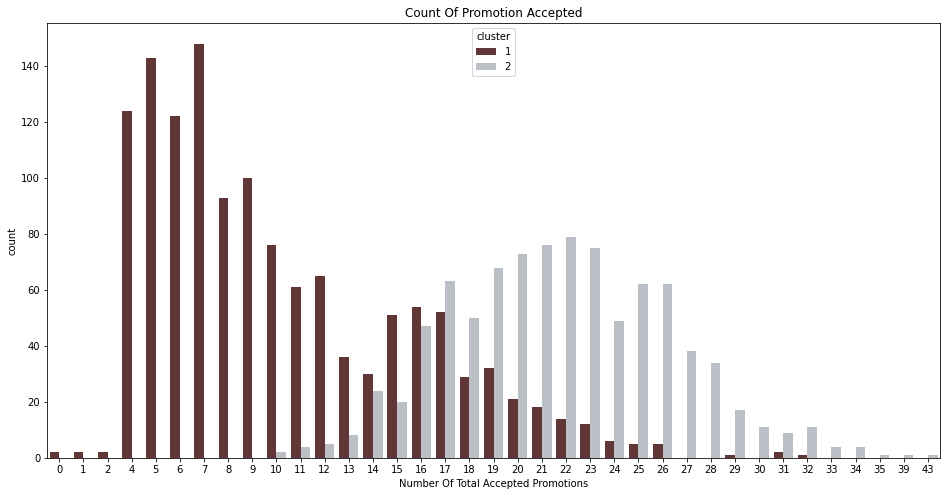

In [ ]:
plt.figure(figsize=(16,8))
pl = sns.countplot(x=mk['TotalNumPurchases'],hue=mk["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

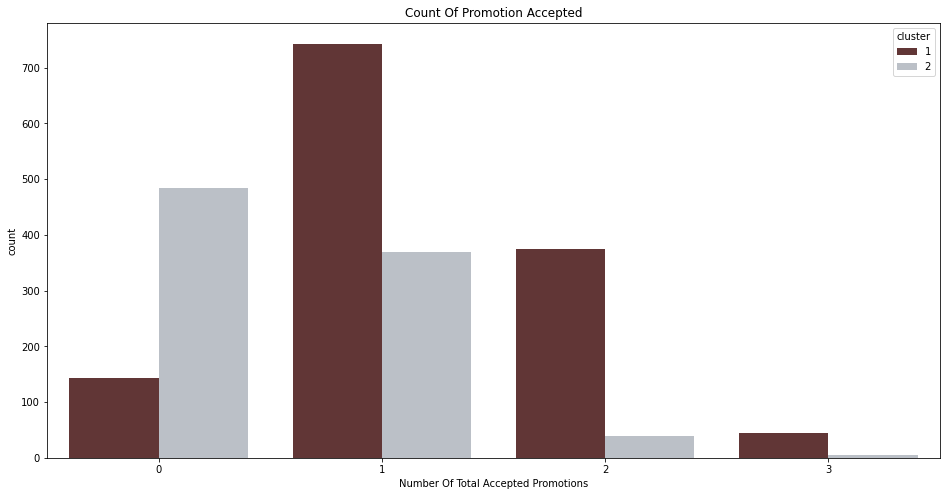

In [ ]:
plt.figure(figsize=(16,8))
pl = sns.countplot(x=mk[ 'Children'],hue=mk["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

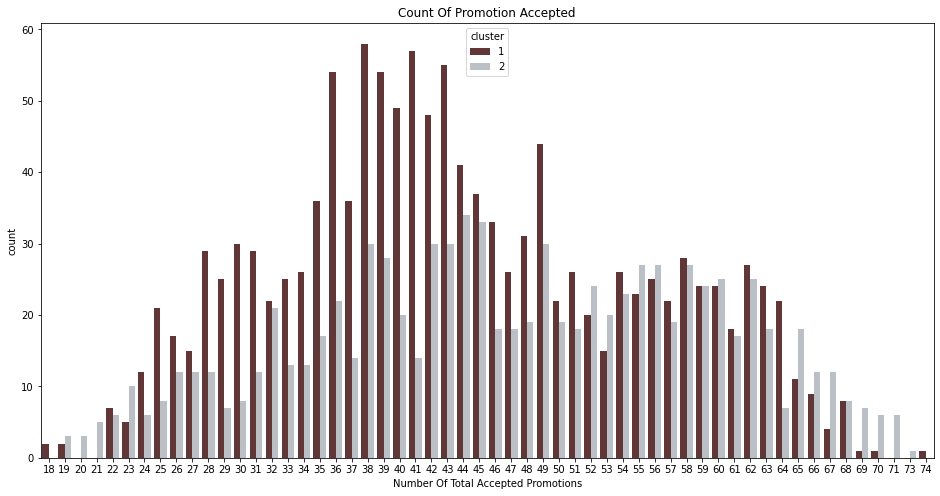

In [ ]:
plt.figure(figsize=(16,8))
pl = sns.countplot(x=mk['Age'],hue=mk["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

**k=4로 늘려보기**

In [ ]:
kmeans=KMeans(n_clusters=3, random_state=42).fit(printcipalComponents)
pred=kmeans.predict(printcipalComponents)
mk['cluster_4'] = pred + 1

In [ ]:
pal = ["#682F2F","#B9C0C9",["#612F21F","#B9C2C0"]
pl = sns.scatterplot(data = mk,x=mk['TotalMntSpent'], y=mk["Income"],hue=mk["cluster_4"], palette= pal)
plt.legend()
plt.show()

SyntaxError: ignored

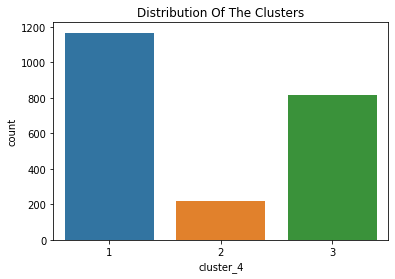

In [ ]:
import seaborn as sns
pl = sns.countplot(x=mk["cluster_4"])
pl.set_title("Distribution Of The Clusters")
plt.show()

**k=3으로 늘려보기**

In [ ]:
kmeans=KMeans(n_clusters=3, random_state=42).fit(printcipalComponents)
pred=kmeans.predict(printcipalComponents)
mk['cluster_3'] = pred + 1

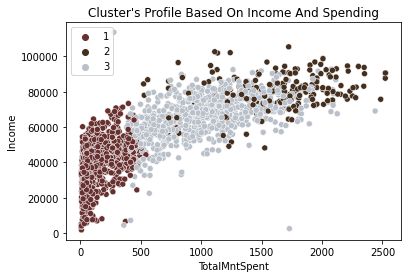

In [ ]:
pal = ["#682F2F","#442F1F","#B9C0C9"]
pl = sns.scatterplot(data = mk,x=mk['TotalMntSpent'], y=mk["Income"],hue=mk["cluster_3"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

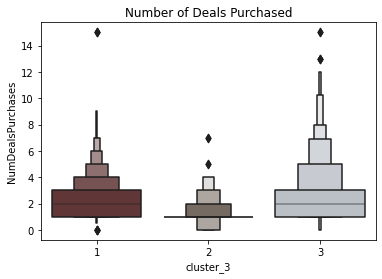

In [ ]:
plt.figure()
pl=sns.boxenplot(y=mk["NumDealsPurchases"],x=mk["cluster_3"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

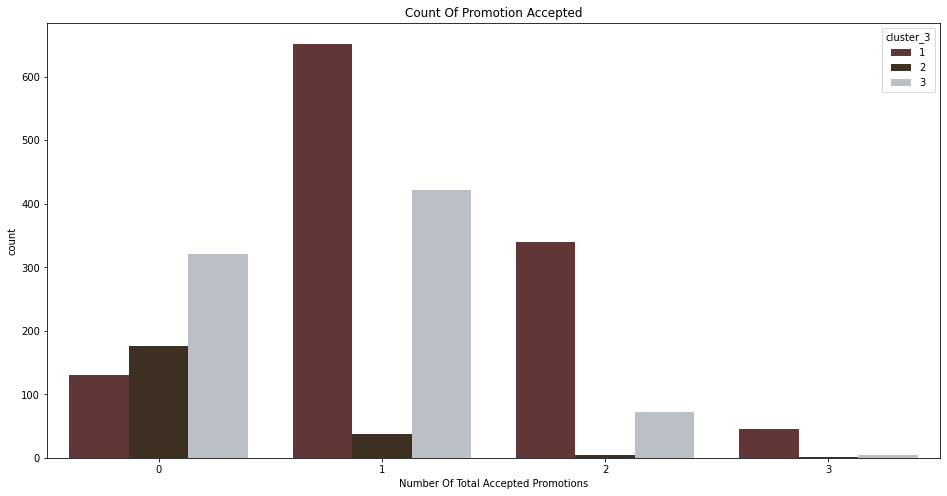

In [ ]:
plt.figure(figsize=(16,8))
pl = sns.countplot(x=mk[ 'Children'],hue=mk["cluster_3"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

k를 3으로 늘려봤지만 k=2인만큼 깔끔하게 구해지지 않아서  최종 k는 2로 정했습니다

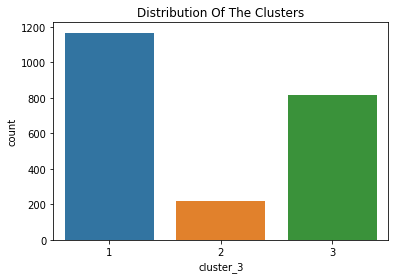

In [ ]:
import seaborn as sns
pl = sns.countplot(x=mk["cluster_3"])
pl.set_title("Distribution Of The Clusters")
plt.show()

### **GMM**

군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방법

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 2).fit(printcipalComponents)

In [ ]:
pred=gmm.predict(printcipalComponents)
pred
mk['gmm_cluster'] = pred + 1

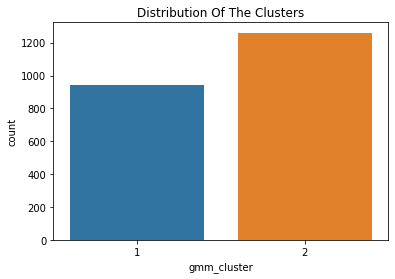

In [ ]:
import seaborn as sns
pl = sns.countplot(x=mk["gmm_cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
mk["gmm_cluster"].value_counts()

2    1260
1     945
Name: gmm_cluster, dtype: int64

Kmeans으로 했을 때는 1: 1309, 2: 896이었다

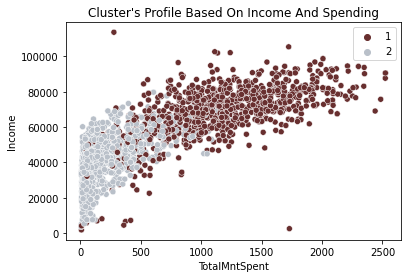

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = mk,x=mk['TotalMntSpent'], y=mk["Income"],hue=mk["gmm_cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
a = mk[mk["gmm_cluster"] != mk['cluster']]
b = mk[mk["gmm_cluster"] == mk['cluster']]

In [ ]:
a.describe()

,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Age,Years_Customer,Days_Customer,cluster,cluster_4,cluster_3,gmm_cluster
count,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000
mean,0.641038,51530.528893,48.813908,302.968658,27.086190,170.875122,38.618511,27.825171,42.985798,2.253673,3.974045,2.674339,5.711068,5.258570,0.074927,0.062194,0.078844,0.066112,0.013712,0.009794,0.157199,610.359452,14.613124,0.452987,0.945642,44.923604,0.965720,510.528404,1.411361,1.804603,1.804603,1.588639
std,0.479813,21123.280138,29.057659,343.941267,40.847255,224.677823,56.060389,42.215509,51.328383,1.817304,2.710752,2.876729,3.237574,2.334946,0.263337,0.241567,0.269562,0.248538,0.116321,0.098505,0.364077,620.467088,7.686354,0.909417,0.753553,11.701457,0.682819,231.908122,0.492201,0.925187,0.925187,0.492201
min,0.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,34473.500000,24.000000,22.000000,2.000000,15.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,7.000000,0.000000,0.000000,36.000000,0.000000,339.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,50510.500000,49.000000,167.000000,8.000000,65.000000,12.000000,8.000000,24.000000,2.000000,3.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,343.000000,15.000000,0.000000,1.000000,44.000000,1.000000,512.000000,1.000000,1.000000,1.000000,2.000000
75%,1.000000,69139.000000,74.000000,495.750000,33.750000,253.000000,50.000000,35.000000,54.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1092.750000,21.000000,1.000000,1.000000,54.000000,1.000000,683.000000,2.000000,3.000000,3.000000,2.000000
max,1.000000,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,43.000000,5.000000,3.000000,74.000000,2.000000,1063.000000,2.000000,3.000000,3.000000,2.000000


In [ ]:
b.describe()

,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Age,Years_Customer,Days_Customer,cluster,cluster_4,cluster_3,gmm_cluster
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.00000,163.000000,163.0,163.000000,163.000000,163.0,163.000000,163.000000,163.000000,163.000000,163.00000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.693252,52769.196319,51.453988,346.202454,17.846626,95.619632,26.957055,18.398773,57.478528,3.128834,5.687117,2.282209,7.233129,6.319018,0.06135,0.226994,0.0,0.042945,0.012270,0.0,0.073620,562.503067,18.331288,0.417178,0.98773,47.251534,1.055215,531.282209,1.355828,2.312883,2.312883,1.355828
std,0.462565,14629.774877,27.276636,239.814078,20.818315,63.396480,34.223007,21.909054,55.018217,2.464932,2.576057,1.467799,2.959752,3.084620,0.24071,0.420179,0.0,0.203357,0.110427,0.0,0.261956,269.754057,5.636144,0.674179,0.69378,11.580285,0.722235,240.070630,0.480239,0.946217,0.946217,0.480239
min,0.000000,1730.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,8.000000,1.000000,0.000000,0.00000,22.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,46648.500000,29.500000,125.000000,2.000000,39.500000,2.500000,2.500000,12.000000,2.000000,4.000000,1.000000,5.000000,5.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,372.500000,15.000000,0.000000,1.00000,39.000000,1.000000,360.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,55284.000000,53.000000,299.000000,11.000000,90.000000,13.000000,10.000000,39.000000,2.000000,6.000000,2.000000,7.000000,6.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,529.000000,18.000000,0.000000,1.00000,48.000000,1.000000,528.000000,1.000000,3.000000,3.000000,1.000000
75%,1.000000,62622.500000,73.000000,537.000000,26.000000,141.000000,39.000000,27.500000,90.000000,4.000000,8.000000,3.000000,9.000000,7.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,769.000000,22.500000,1.000000,1.00000,57.000000,2.000000,736.500000,2.000000,3.000000,3.000000,2.000000
max,1.000000,79761.000000,98.000000,897.000000,103.000000,253.000000,179.000000,157.000000,262.000000,15.000000,11.000000,6.000000,13.000000,20.000000,1.00000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1245.000000,32.000000,3.000000,3.00000,71.000000,2.000000,1059.000000,2.000000,3.000000,3.000000,2.000000


제일 차이나는 값을 가진 변수를 기준으로 Gmm을 했을 경우와 knn을 했을 경우 다른 결과값을 가지는 데이터셋 a 같은 결과값을 가지는 데이터 셋 b를 시각화해주었다

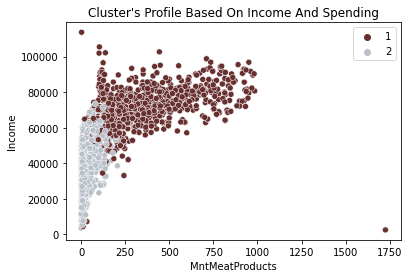

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = a,x=a['MntMeatProducts'], y=a["Income"],hue=a["gmm_cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

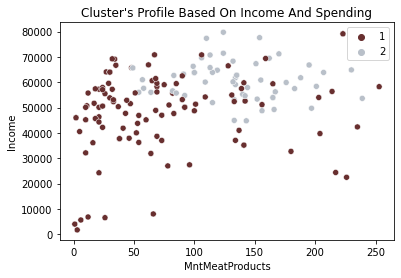

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = b,x=b['MntMeatProducts'], y=b["Income"],hue=b["gmm_cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

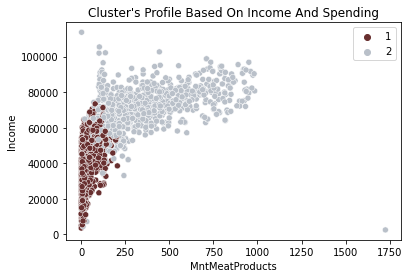

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = a,x=a['MntMeatProducts'], y=a["Income"],hue=a["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

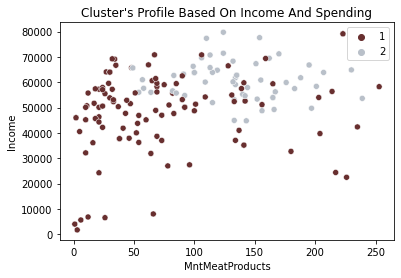

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = b,x=b['MntMeatProducts'], y=b["Income"],hue=b["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

TotalMntSpent

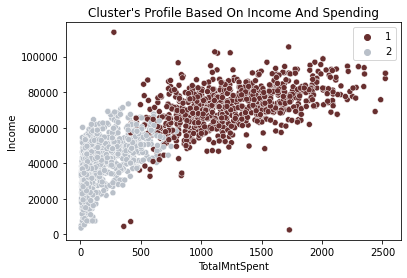

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = a,x=a['TotalMntSpent'], y=a["Income"],hue=a["gmm_cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

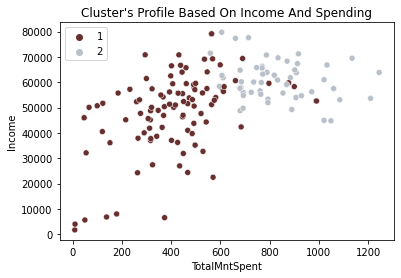

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = b,x=b['TotalMntSpent'], y=b["Income"],hue=b["gmm_cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

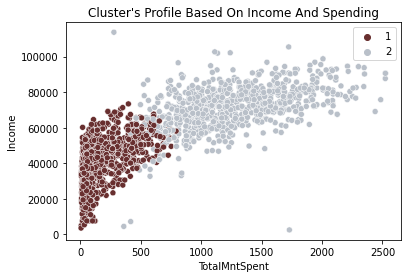

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = a,x=a['TotalMntSpent'], y=a["Income"],hue=a["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

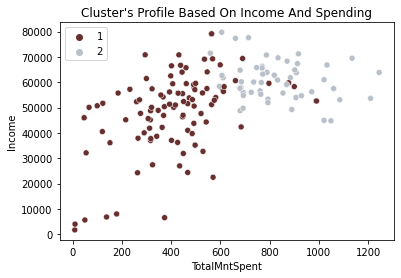

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = b,x=b['TotalMntSpent'], y=b["Income"],hue=b["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

MntFishProducts

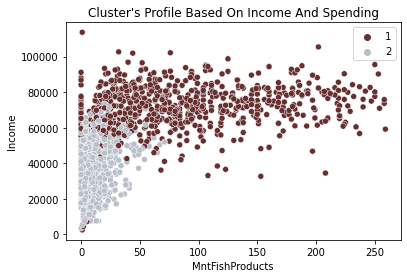

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = a,x=a['MntFishProducts'], y=a["Income"],hue=a["gmm_cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

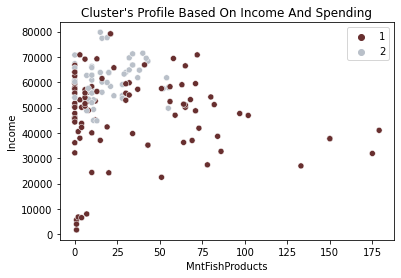

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = b,x=b['MntFishProducts'], y=b["Income"],hue=b["gmm_cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

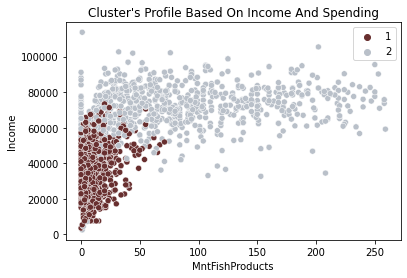

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = a,x=a['MntFishProducts'], y=a["Income"],hue=a["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

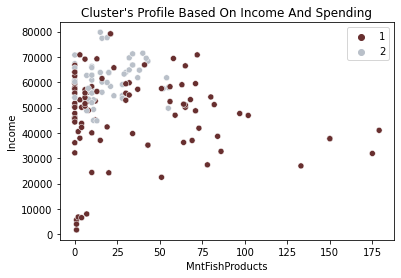

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = b,x=b['MntFishProducts'], y=b["Income"],hue=b["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

MntSweetProducts

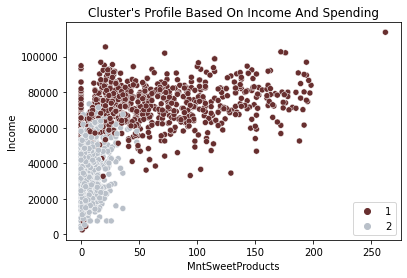

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = a,x=a['MntSweetProducts'], y=a["Income"],hue=a["gmm_cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

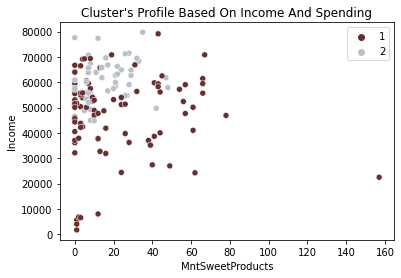

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = b,x=b['MntSweetProducts'], y=b["Income"],hue=b["gmm_cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

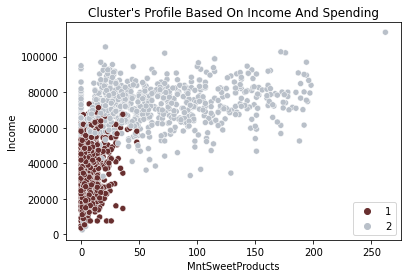

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = a,x=a['MntSweetProducts'], y=a["Income"],hue=a["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

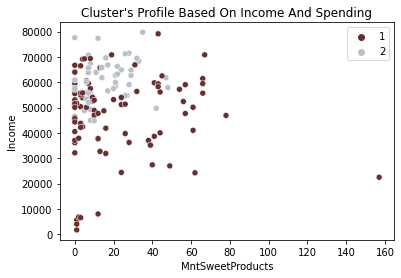

In [ ]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = b,x=b['MntSweetProducts'], y=b["Income"],hue=b["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()